# Clothes Classification with Neural Networks

In this notebook we are going to explore the Neural Networks for image classification. We are going to use the same dataset of the SVM notebook: Fashion MNIST (https://pravarmahajan.github.io/fashion/), a dataset of small images of clothes and accessories.

The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [1]:
#load the required packages and check Scikit-learn version

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import sklearn
print ('scikit-learn version: ', sklearn.__version__)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC

scikit-learn version:  0.20.2


In [2]:
# helper function to load Fashion MNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

# TODO 
Place a seed for the random generator (you can use your "numero di matricola"). Try to change the seed to see the impact of the randomization.

In [3]:
ID = 1233#PLACE YOUR ID
np.random.seed(ID)

In [4]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
X, y = load_mnist("data")
print("Number of samples in the MNIST dataset:", X.shape[0])
# rescale the data
X = X / 255.0

Number of samples in the MNIST dataset: 60000


Now split into training and test. We start with a small training set of 600 samples to reduce computation time. Make sure that each label is present at least 10 times
in training frequencies.

In [5]:
#random permute the data and split into training and test taking the first 600
#data samples as training and the rests as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [57 64 61 54 59 61 53 57 79 55]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


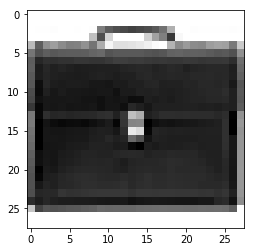

LABEL: 8
INPUT:


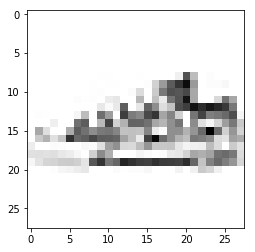

LABEL: 7
INPUT:


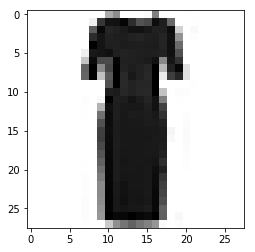

LABEL: 3


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,10000)

## TO DO 1

Now use a feed-forward Neural Network for prediction. Use the multi-layer perceptron classifier, with the following parameters: max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization term.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 100. Evaluate the architectures you chose using GridSearchCV with cv=5.

You can reduce the number of iterations if the running time is too long on your computer.


In [8]:
# these are sample values but feel free to change them as you like, try to experiment with different sizes!!
parameters = {'hidden_layer_sizes': [(10,), (20,), (40,), (60,), (80,), (20, 10), (40,20,), (40,30,20) ]}

mlp = MLPClassifier(max_iter=300, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)

nn_classif = GridSearchCV(estimator =  mlp, cv = 5, param_grid = parameters )
nn_classif.fit(X_train, y_train)

/opt/ubuntu-16.04/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=300, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1233, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'hidden_layer_sizes': [(10,), (20,), (40,), (60,), (80,), (20, 10), (40, 20), (40, 30, 20)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [9]:
print ('RESULTS FOR NN\n')

print("Best parameters set found:",  nn_classif.best_params_ )
print("Score with best parameters:", nn_classif.best_score_)
#best_hidd_lay_size = nn_classif.best_params_.get('hidden_layer_sizes')
best_hidd_lay_size = (80,)
print("\nAll scores on the grid:")
scores = pd.DataFrame(nn_classif.cv_results_)[['rank_test_score','param_hidden_layer_sizes','mean_test_score',
                                               'std_test_score', 'mean_fit_time','std_fit_time',
                                               'mean_score_time','std_score_time']]
scores.sort_values('rank_test_score')

RESULTS FOR NN

Best parameters set found: {'hidden_layer_sizes': (60,)}
Score with best parameters: 0.7633333333333333

All scores on the grid:


/opt/ubuntu-16.04/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/ubuntu-16.04/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/ubuntu-16.04/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/ubuntu-16.04/conda/lib/

,rank_test_score,param_hidden_layer_sizes,mean_test_score,std_test_score,mean_fit_time,std_fit_time,mean_score_time,std_score_time
3,1,"(60,)",0.763333,0.026990,1.101431,0.106182,0.001019,0.000528
2,2,"(40,)",0.756667,0.034003,0.804376,0.071222,0.000721,0.000321
6,3,"(40, 20)",0.745000,0.033812,0.657687,0.259743,0.000678,0.000270
4,4,"(80,)",0.741667,0.035353,0.921369,0.368437,0.000942,0.000488
1,5,"(20,)",0.733333,0.039666,1.099054,0.333394,0.000513,0.000105
0,6,"(10,)",0.721667,0.028113,1.148929,0.457834,0.003240,0.005357
7,7,"(40, 30, 20)",0.688333,0.063577,0.609345,0.281059,0.001170,0.000526
5,8,"(20, 10)",0.426667,0.274686,0.411134,0.313441,0.000484,0.000016


### TO DO 2

Now try also different batch sizes, while keeping the best NN architecture you have found above. Remember that the batch size was previously set to the default value, i.e., min(200, n_samples). 
Recall that a batch size of 1 corresponds to baseline SGD, while using all the 480 training samples (there are 600 samples but in cross validation with 5 folders we use 1/5 of them for validation at each round) corresponds to standard GD and using a different mini-batch size lies in the middle between the two extreme cases.

In [10]:
# these are sample values corresponding to baseline SGD, a reasonable mini-batch size and standard GD
# again feel free to change them as you like, try to experiment with different batch sizes!!
parameters = {'batch_size': [1, 32, 64, 250, 480]}

# need to specify that you would like to use the standard k-fold split otherwise sklearn create splits of different sizes
kf = sklearn.model_selection.KFold(n_splits=5)
mlp_kf = MLPClassifier(max_iter=300, alpha=1e-4, solver='sgd', 
                         hidden_layer_sizes = best_hidd_lay_size,
                         tol=1e-4, random_state=ID,
                         learning_rate_init=.1)

# recall to use cv=kf in GridSearchCV parameters to use the k-fold subdivision seen in the lectures
kf_classif = GridSearchCV(estimator =  mlp_kf, cv = kf, param_grid = parameters )
kf_classif.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(80,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=300, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1233, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'batch_size': [1, 32, 64, 250, 480]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [11]:
print ('RESULTS FOR NN\n')

print("Best parameters set found:",  kf_classif.best_params_ )
best_batch_size =  kf_classif.best_params_.get('batch_size')
print("Score with best parameters:", kf_classif.best_score_)
print("\nAll scores on the grid:")
scores = pd.DataFrame(kf_classif.cv_results_)[['rank_test_score','param_batch_size','mean_test_score',
                                               'std_test_score', 'mean_fit_time','std_fit_time',
                                               'mean_score_time','std_score_time']]
scores.sort_values('rank_test_score')

RESULTS FOR NN

Best parameters set found: {'batch_size': 250}
Score with best parameters: 0.7733333333333333

All scores on the grid:


/opt/ubuntu-16.04/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/ubuntu-16.04/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/ubuntu-16.04/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/ubuntu-16.04/conda/lib/

,rank_test_score,param_batch_size,mean_test_score,std_test_score,mean_fit_time,std_fit_time,mean_score_time,std_score_time
3,1,250,0.773333,0.040620,1.358693,0.244821,0.001928,0.002354
4,2,480,0.765000,0.036286,1.260161,0.506536,0.001060,0.000561
2,3,64,0.760000,0.028087,1.622570,0.533844,0.001176,0.000751
1,4,32,0.750000,0.005270,1.709910,0.731480,0.003039,0.004808
0,5,1,0.088333,0.025055,38.180238,7.176915,0.001203,0.000770


### QUESTION 1

What do you observe for different architectures and batch sizes? How do the number of layers and their sizes affect the performances? What do you observe for different batch sizes, in particular what happens to the training convergence for different batch sizes (notice that the algorithm could not converge for some batch sizes)?

We see that our best performances are given by using a single hidden layer (and almost all best scores are given by a single hidden layer), but it takes more time to train my model when we increase the number of nodes of a layer. Performances for both (60,) and (80,) nodes are the same, only the fit times slightly changes. We choose 60 to improve stability later.

We see moreover that for a quite big batch size (250) we obtain the best results in term of test score. The smaller the batch size is (i.e. using a SGD), the more time it takes to converge and test score is really low. Using a large batch size on the other hand doesn't change so much my performance (just slightly!).

### TO DO 3

Now try also to use different learning rates, while keeping the best NN architecture and batch size you have found above. Plot the learning curves (i.e., the variation of the loss over the steps, you can get it from the loss_curve_ object of sklearn) for the different values of the learning rate . 

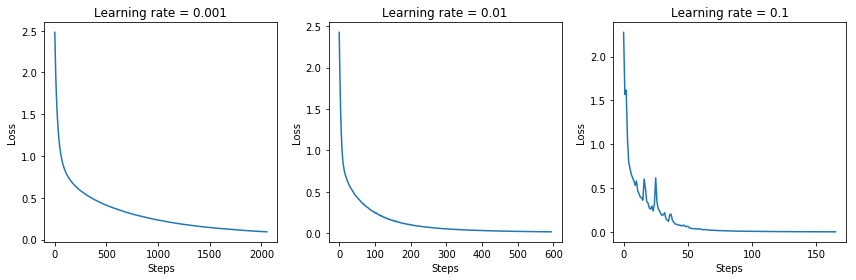

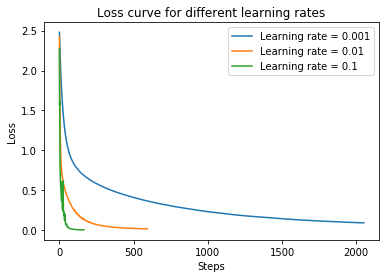

In [12]:
import matplotlib.pyplot as plt

lr_list = [10**exp for exp in range(-3,0)]
loss_curves = []

fig = plt.figure(figsize=(12,4))

for lr, index in zip(lr_list, range(3)):
    mlp_lr = MLPClassifier(max_iter= 10000, alpha=1e-4, solver='sgd', 
                         hidden_layer_sizes = best_hidd_lay_size,
                         batch_size = best_batch_size,
                         tol=1e-4, random_state=ID,
                         learning_rate_init = lr)
    mlp_lr.fit(X_train, y_train)
    ax = fig.add_subplot(1,3,index+1)
    ax.set_title("Learning rate = "+str(lr))
    ax.set_xlabel("Steps")
    ax.set_ylabel("Loss")
    ax.plot(mlp_lr.loss_curve_)
    loss_curves.append(mlp_lr.loss_curve_)
    
plt.tight_layout()
plt.show()

for lr, loss_c in zip(lr_list, loss_curves):
    plt.plot(loss_c, label = "Learning rate = "+str(lr))
    
plt.title("Loss curve for different learning rates")
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [13]:
parameters = {'learning_rate_init': [0.1, 0.01, 0.001]}

mlp_lr = MLPClassifier(max_iter= 10000, alpha=1e-4, solver='sgd', 
                       hidden_layer_sizes = best_hidd_lay_size,
                       batch_size = best_batch_size,
                       tol=1e-4, random_state=ID )
lr_classif = GridSearchCV(estimator =  mlp_lr, cv = kf, param_grid = parameters )
lr_classif.fit(X_train, y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found:",  lr_classif.best_params_ )
best_lr =  lr_classif.best_params_.get('learning_rate_init')
print("Score with best parameters:", lr_classif.best_score_)
print("\nAll scores on the grid:")
scores = pd.DataFrame(lr_classif.cv_results_)[['rank_test_score','param_learning_rate_init','mean_test_score',
                                               'std_test_score', 'mean_fit_time','std_fit_time',
                                               'mean_score_time','std_score_time']]
scores.sort_values('rank_test_score')

RESULTS FOR NN

Best parameters set found: {'learning_rate_init': 0.1}
Score with best parameters: 0.7733333333333333

All scores on the grid:


/opt/ubuntu-16.04/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/ubuntu-16.04/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/ubuntu-16.04/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/ubuntu-16.04/conda/lib/

,rank_test_score,param_learning_rate_init,mean_test_score,std_test_score,mean_fit_time,std_fit_time,mean_score_time,std_score_time
0,1,0.1,0.773333,0.04062,0.799563,0.073766,0.000750,0.000273
1,2,0.01,0.768333,0.03993,2.808856,0.141035,0.000603,0.000008
2,3,0.001,0.765000,0.03993,11.180451,0.699963,0.000662,0.000105


### QUESTION 2

Comment about the learning curves (i.e. the variation of the loss over the steps). How does the curve changes for different learning rates in terms of stability and speed of convergence ?

As we would expect, the bigger the learning rate is, the more unstable is the algorithm (indeed we see some spikes!) and the faster it converges. Using a smaller learning rate (0.001) it always converges, but we had to increase the number of max iterations, since the training is very slow compaired to the other ones (0.1, 0.01) [see mean_fit_time in the grid above]. A good trade off between the two can be the middle one, i.e. 0.01, which for this case does not even have the best test performance, but it might happen because of the starting seed. 

### TO DO 4

Now get training and test error for a NN with best parameters (architecture, batch size and learning rate)from above. Plot the learning curve also for this case.


RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.208956


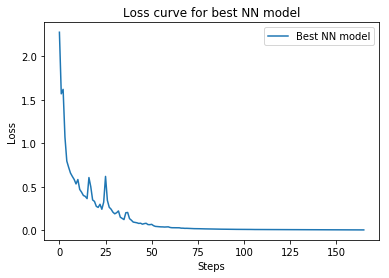

In [14]:
#get training and test error for the best NN model from CV
mlp_best = MLPClassifier(max_iter= 10000, alpha=1e-4, solver='sgd', 
                       hidden_layer_sizes = best_hidd_lay_size,
                       batch_size = best_batch_size,
                       tol=1e-4, random_state=ID,
                       learning_rate_init = best_lr)
mlp_best.fit(X_train,y_train)

training_error = 1. - mlp_best.score(X_train,y_train)
test_error = 1. - mlp_best.score(X_test,y_test)

print ('\nRESULTS FOR BEST NN\n')
print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

plt.plot(mlp_best.loss_curve_, label = "Best NN model")
plt.title("Loss curve for best NN model")
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.legend()
plt.show()

## More data 
Now let's do the same but using 5000 (or less if it takes too long on your machine) data points for training. Use the same NN architecture as before, but you can try more if you like and have a powerful computer !!

In [15]:
X = X[permutation]
y = y[permutation]

m_training = 5000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [510 470 513 518 498 484 464 546 505 492]


## TO DO 5

Now train the NNs with the added data points using the optimum parameters found above. Eventually, feel free to try different architectures if you like. We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

In [16]:
# use best architecture and params from before

mlp_best_large = MLPClassifier(max_iter= 10000, alpha=1e-4, solver='sgd', 
                       hidden_layer_sizes = best_hidd_lay_size,
                       batch_size = best_batch_size,
                       tol=1e-4, random_state=ID,
                       learning_rate_init = best_lr,
                       verbose=True)
mlp_best_large.fit(X_train,y_train)

training_error_large = 1. - mlp_best_large.score(X_train,y_train)
test_error_large = 1. - mlp_best_large.score(X_test,y_test)

Iteration 1, loss = 1.29532267
Iteration 2, loss = 0.64408243
Iteration 3, loss = 0.55298665
Iteration 4, loss = 0.47607638
Iteration 5, loss = 0.45015500
Iteration 6, loss = 0.41190311
Iteration 7, loss = 0.39098791
Iteration 8, loss = 0.36652803
Iteration 9, loss = 0.34613476
Iteration 10, loss = 0.33230289
Iteration 11, loss = 0.32034973
Iteration 12, loss = 0.29662180
Iteration 13, loss = 0.30028502
Iteration 14, loss = 0.28181392
Iteration 15, loss = 0.26333414
Iteration 16, loss = 0.25504634
Iteration 17, loss = 0.25035055
Iteration 18, loss = 0.23024233
Iteration 19, loss = 0.23486049
Iteration 20, loss = 0.21590387
Iteration 21, loss = 0.20541458
Iteration 22, loss = 0.20288526
Iteration 23, loss = 0.19456402
Iteration 24, loss = 0.18906222
Iteration 25, loss = 0.19142491
Iteration 26, loss = 0.20029786
Iteration 27, loss = 0.16317639
Iteration 28, loss = 0.19379953
Iteration 29, loss = 0.16407728
Iteration 30, loss = 0.16703455
Iteration 31, loss = 0.14653286
Iteration 32, los

In [17]:
print ('RESULTS FOR NN\n')
print ("NN training error: %f" % training_error_large)
print ("NN test error: %f" % test_error_large)

RESULTS FOR NN

NN training error: 0.000000
NN test error: 0.155836


## QUESTION 3
Compare the train and test errors you got with a large number of samples with the best one you obtained with only 600 data points. Comment about the results you obtained.

As we had for other homework assignments, when we increase the training dataset, we might get some points that can be misclassified during the training (i.e. training error different from zero), but in this case it doesn't happen because of the choice of the seed. In any case, the larger is the training dataset, the better the performance is. We can conclude that having a larger training dataset is better than a smaller one, but of course the time requested in order to train my model will be larger. 

### TO DO 7

Plot an example that was missclassified by NN with m=600 training data points and it is now instead correctly classified by NN with m=5000 training data points.

INPUT:


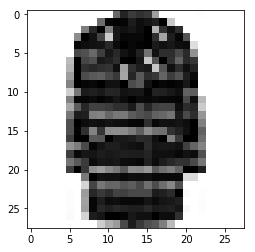

LABEL: 4
33641  index was not correctly classified by NN with smaller dataset and now is correctly classified by NN with larger dataset.


In [18]:
NN_prediction = mlp_best.predict(X_test)
large_NN_prediction = mlp_best_large.predict(X_test)

miscl_samples = [i for i in range(len(NN_prediction)) if (NN_prediction[i] != large_NN_prediction[i]) and (large_NN_prediction[i] == y_test[i]) ]

rand = np.random.choice(miscl_samples)
plot_input(X_test,y_test,rand)

print(rand, " index was not correctly classified by NN with smaller dataset and now is correctly classified by NN with larger dataset.")
        

### TO DO 8

Let's plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 600 data points and with 5000 data points. The code is already provided, just fix variable names (e.g., replace mlp ,  mlp_large with your estimators) in order to have it working with your implementation



Weights with 600 data points:


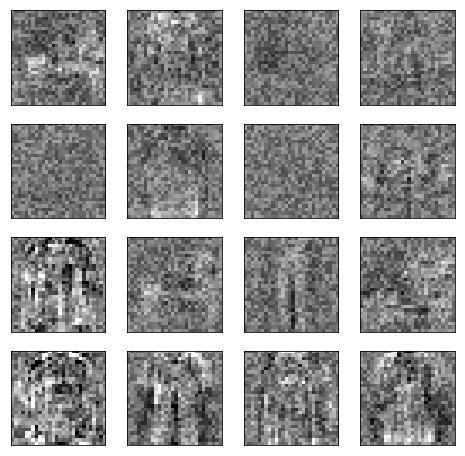

Weights with 5000 data points:


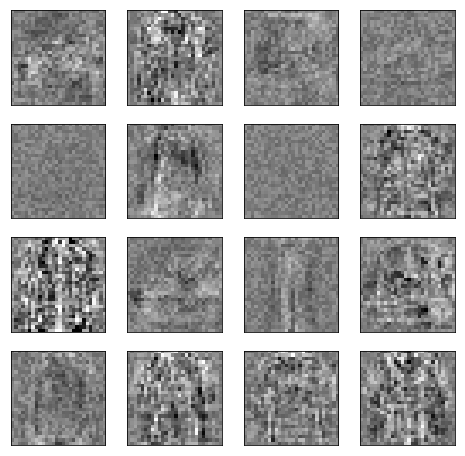

In [19]:
# The code is already provided, fix variable names in order to have it working with your implementation

print("Weights with 600 data points:")

fig, axes = plt.subplots(4, 4, figsize=(8,8))
vmin, vmax = mlp_best.coefs_[0].min(), mlp_best.coefs_[0].max()
for coef, ax in zip(mlp_best.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 5000 data points:")

fig, axes = plt.subplots(4, 4, figsize=(8,8))
vmin, vmax = mlp_best_large.coefs_[0].min(), mlp_best_large.coefs_[0].max()
for coef, ax in zip(mlp_best_large.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## QUESTION 4

Describe what do you observe by looking at the weights

We observe that there are some weights that look like they have a structure in plotting them (for example they remind of shirts/jacket...) and its number is around the number of the number of labels, while the ones that do not have any structure may not have been used in my training.

### TO DO 9

Report the best SVM model and its parameters, you found in the last notebook (or check out the solution on the moodle webpage of the course). Fit it on a few data points and compute its training and test scores.

In [20]:
# use best parameters found in the SVM notebook, create SVM and perform fitting

best_SVM = SVC(kernel = 'rbf', C = 50, gamma = 0.005)
best_SVM.fit(X_train, y_train)
SVM_prediction = best_SVM.predict(X_test)

SVM_training_error = 1. - best_SVM.score(X_train,y_train)
SVM_test_error = 1. - best_SVM.score(X_test,y_test)

In [21]:
print('RESULTS FOR SVM')
print("Training error SVM:", SVM_training_error)
print("Test error SVM:", SVM_test_error)

print('\nRESULTS FOR NN (larger dataset)')
print("NN training error:", training_error_large)
print("NN test error:", test_error_large )

print('\nRESULTS FOR NN (smaller dataset)')
print("NN training error:", training_error)
print("NN test error:", test_error )

RESULTS FOR SVM
Training error SVM: 0.0018000000000000238
Test error SVM: 0.1466909090909091

RESULTS FOR NN (larger dataset)
NN training error: 0.0
NN test error: 0.15583636363636366

RESULTS FOR NN (smaller dataset)
NN training error: 0.0
NN test error: 0.208956228956229



 Confusion matrix SVM


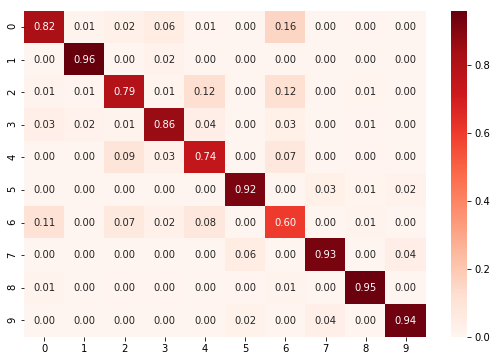


 Confusion matrix NN (smaller dataset)


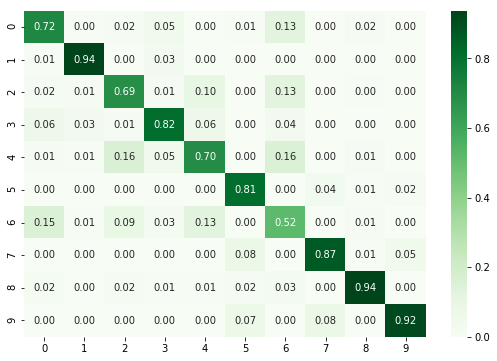


 Confusion matrix NN (larger dataset)


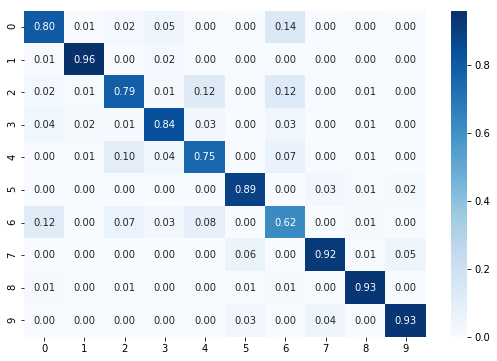

In [22]:
import sklearn.metrics as skm

u, counts = np.unique(y_test, return_counts=True)
confusion_SVM = skm.confusion_matrix( SVM_prediction, y_test)
confusion_NN = skm.confusion_matrix( NN_prediction, y_test)
confusion_NN_large = skm.confusion_matrix( large_NN_prediction, y_test)

print("\n Confusion matrix SVM")
plt.figure(figsize = (9,6))
sns.heatmap(confusion_SVM/counts[:,None], annot=True, fmt = "1.2f" , cmap="Reds" )
plt.show()

print("\n Confusion matrix NN (smaller dataset)")
plt.figure(figsize = (9,6))
sns.heatmap(confusion_NN/counts[:,None], annot=True, fmt =  "1.2f" , cmap="Greens" )
plt.show()

print("\n Confusion matrix NN (larger dataset)")
plt.figure(figsize = (9,6))
sns.heatmap(confusion_NN_large/counts[:,None], annot=True, fmt =  "1.2f" , cmap="Blues" )
plt.show()

## QUESTION 5
Compare the results of SVM and of NN. Which one would you prefer? 

I prefer the SVM which is generally better than the NN both with large dataset and, above all, the one with small dataset. We can see it compairing the confusion matrices and its values: the percentage of elements that are correctly classified is generaly bigger along the diagonal of the SVM matrix: indeed the SVM test error is the smallest one, despite of the training error, which is the biggest one.